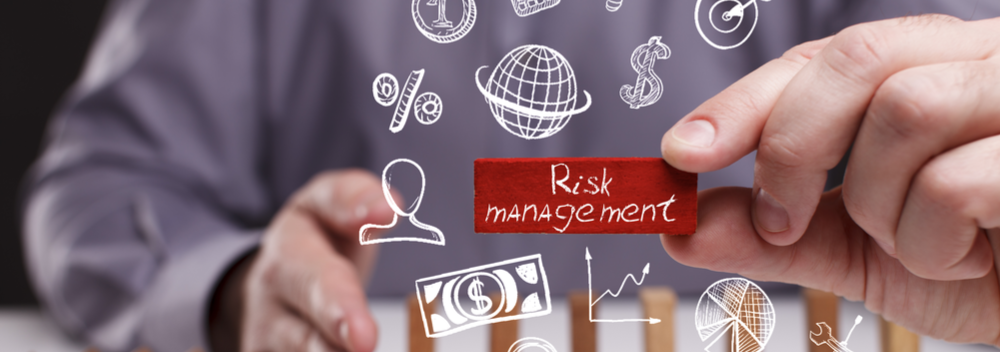

# Problem Statement

## Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Steps involved:
1. Reading and Understanding the Data
2. Data cleaning & preperation
3. Data Visualization (Univariate/Bivariate/Multivariate Analysis)
3. Conclusion: This part is about conclusion drawn from the study.

# 1. Reading and Understanding the Data

In [1]:
#Import all reqiore Libraries
import numpy as np
import pandas as pd
# Graphical libraries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_theme(style="darkgrid")
import math

%matplotlib inline

In [3]:
#Importing loan data for 2007 to 2011
df = pd.read_csv(r"C:\Users\admin\Documents\PG-Data-AI-ML-Course\Lending club\EDA\loan_data.csv",encoding="ISO-8859-1",low_memory=False)
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('precision',2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [12]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [13]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [14]:
#Check the number of null values in the columns
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


It is observed that many columns have all the null values, these columns may be deleted

In [21]:
#Dropping columns & rows with all the Null values
df=df.dropna(how='all', axis =0)
df=df.dropna(how='all', axis =1)

In [22]:
round(100*(df.isnull().sum()/len(df.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

Deleting columns with null value mostly null values "mths_since_last_delinq","mths_since_last_record","next_pymnt_d". `desc` column might have some interesting data so same is being kept even though 32.58% data is null. 

### Understanding Columns

In [25]:
#Description of columns of loan data
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('precision',2)
Dictionary=pd.read_excel(r"C:\Users\admin\Documents\PG-Data-AI-ML-Course\Lending club\EDA\Data_Dictionary.xlsx")
Dictionary

,LoanStatNew,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,all_util,Balance to credit limit on all trades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_inc,The self-reported annual income provided by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,annual_inc_joint,The combined self-reported annual income provi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,application_type,Indicates whether the loan is an individual ap...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,avg_cur_bal,Average current balance of all accounts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,bc_open_to_buy,Total open to buy on revolving bankcards.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bc_util,Ratio of total current balance to high credit/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df['desc'].head(10)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
5                                                  NaN
6      Borrower added on 12/18/11 > I am planning o...
7      Borrower added on 12/16/11 > Downpayment for...
8      Borrower added on 12/21/11 > I own a small h...
9      Borrower added on 12/16/11 > I'm trying to b...
Name: desc, dtype: object

In [27]:
df.describe(include="all")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.97e+04,3.97e+04,39717.00,39717.00,39717.00,39717,39717,39717.00,39717,39717,37258,38642,39717,3.97e+04,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.00,39717.00,39717,39717.00,39717.00,39717.00,39717.00,39667,39717.00,39717,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39646,39717.00,39715,39661.0,39717.0,39717,39717.0,39661.0,39717.0,39020.00,39678.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,106,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,May-16,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,10308,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN
mean,6.83e+05,8.50e+05,11219.44,10947.71,10397.45,NaN,NaN,324.56,NaN,NaN,NaN,NaN,NaN,6.90e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.32,0.15,NaN,0.87,9.29,0.06,13382.53,NaN,22.09,NaN,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,NaN,2678.83,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.04,0.0
std,2.11e+05,2.66e+05,7456.67,7187.24,7128.45,NaN,NaN,208.87,NaN,NaN,NaN,NaN,NaN,6.38e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.68,0.49,NaN,1.07,4.40,0.24,15885.02,NaN,11.40,NaN,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,NaN,4447.14,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.20,0.0
min,5.47e+04,7.07e+04,500.00,500.00,0.00,NaN,NaN,15.69,NaN,NaN,NaN,NaN,NaN,4.00e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,2.00,0.00,0.00,NaN,2.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.00,0.0
25%,5.16e+05,6.67e+05,5500.00,5400.00,5000.00,NaN,NaN,167.02,NaN,NaN,NaN,NaN,NaN,4.04e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.17,0.00,NaN,0.00,6.00,0.00,3703.00,NaN,13.00,NaN,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,NaN,218.68,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.00,0.0
50%,6.66e+05,8.51e+05,10000.00,9600.00,8975.00,NaN,NaN,280.22,NaN,NaN,NaN,NaN,NaN,5.90e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.40,0.00,NaN,1.00,9.00,0.00,8850.00,NaN,20.00,NaN,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,NaN,546.14,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.00,0.0
75%,8.38e+05,1.05e+06,15000.00,15000.00,14400.00,NaN,NaN,430.78,NaN,NaN,NaN,NaN,NaN,8.23e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.60,0.00,NaN,1.00,12.00,0.00,17058.00,NaN,29.00,NaN,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,NaN,3293.16,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.00,0.0


- desc column is similar to purpose of loan therefore dropping the column, also title column is also similar to purpose thus same is also dropped.
- Also columns related to `behavioral attributes` can be dropped as we are analysing the comparison between columns which can impact default of loan before sanction of loan as these data columns will not be availble to us before sanction. Also funding will be done after sanction thus columns related to funding is being dropped

In [28]:
column_drop=['id',
             'member_id',
             'pymnt_plan',
             'zip_code',
             'url',
             'initial_list_status',
             'out_prncp','out_prncp_inv',
             'collections_12_mths_ex_med',
             'policy_code','tax_liens',
             'chargeoff_within_12_mths',
             'delinq_amnt',
             'desc',
             'application_type',
             'total_rec_late_fee',
             'pub_rec_bankruptcies',
             'recoveries',
             'collection_recovery_fee',
             'last_pymnt_d',
             'last_pymnt_amnt',
             'last_credit_pull_d',
             'acc_now_delinq',
             'open_acc',
             'total_acc',
             'total_pymnt',
             'total_pymnt_inv',
             'total_rec_prncp',
             'total_rec_int',
             'revol_bal',
             'revol_util',
             'title',
             'emp_title',
             'delinq_2yrs',
             'earliest_cr_line',
             'inq_last_6mths',
             'pub_rec'
            ]

In [29]:
#Deleting all the columns which are not required and having only unique value and all unique values like id, member_id, url etc.
df_loan = df.drop(column_drop, axis =1)

In [30]:
df_loan.describe(include="all")

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
count,39717.00,39717.00,39717.00,39717,39717,39717.00,39717,39717,38642,39717,3.97e+04,39717,39717,39717,39717,39717,39717.00
unique,NaN,NaN,NaN,2,371,NaN,7,35,11,5,NaN,3,55,3,14,50,NaN
top,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,debt_consolidation,CA,NaN
freq,NaN,NaN,NaN,29096,956,NaN,12020,2917,8879,18899,NaN,16921,2260,32950,18641,7099,NaN
mean,11219.44,10947.71,10397.45,NaN,NaN,324.56,NaN,NaN,NaN,NaN,6.90e+04,NaN,NaN,NaN,NaN,NaN,13.32
std,7456.67,7187.24,7128.45,NaN,NaN,208.87,NaN,NaN,NaN,NaN,6.38e+04,NaN,NaN,NaN,NaN,NaN,6.68
min,500.00,500.00,0.00,NaN,NaN,15.69,NaN,NaN,NaN,NaN,4.00e+03,NaN,NaN,NaN,NaN,NaN,0.00
25%,5500.00,5400.00,5000.00,NaN,NaN,167.02,NaN,NaN,NaN,NaN,4.04e+04,NaN,NaN,NaN,NaN,NaN,8.17
50%,10000.00,9600.00,8975.00,NaN,NaN,280.22,NaN,NaN,NaN,NaN,5.90e+04,NaN,NaN,NaN,NaN,NaN,13.40
75%,15000.00,15000.00,14400.00,NaN,NaN,430.78,NaN,NaN,NaN,NaN,8.23e+04,NaN,NaN,NaN,NaN,NaN,18.60


In [31]:
#Columns in dataframe
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti'],
      dtype='object')

In [32]:
100*round(df_loan.isnull().sum()/len(df_loan.index),5)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
dtype: float64

In [33]:
### Dropping rows with null values
df_loan = df_loan.loc[~df_loan["emp_length"].isnull(),:]

In [34]:
#Checking Null values in data
df_loan.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
dtype: int64

In [35]:
df_loan.shape

(38642, 17)

- ### Sanity Check

In [36]:
#Checking that loan amount>funded_amnt>funded_amnt_inv

(df_loan.loan_amnt<df_loan.funded_amnt).sum()

0

In [37]:
(df_loan.loan_amnt<df_loan.funded_amnt_inv).sum()

0

In [38]:
(df_loan.funded_amnt<df_loan.funded_amnt_inv).sum()

0

### - Our target column is `loan_status` for label as `charged-off` which indicated default against a loan 

In [39]:
#Distribution of Loan_status data
df_loan.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [40]:
ls ='loan_status'

As `current status` is of no use in analysis, therfore same is being dropped 

In [41]:
#Removing current status data and marking fully paid as 0 and charged off as 1
df_loan = df_loan.loc[~(df_loan[ls] == 'Current'),:]
df_loan[ls]= (df_loan[ls] != 'Fully Paid').astype(int)

df_loan[ls].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [42]:
#datatype of all the columns
df_loan.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status              int32
purpose                 object
addr_state              object
dti                    float64
dtype: object

In [43]:
#Cleaning data
#Interest rate column and removing % and converting to float type for analysis
df_loan["int_rate"]=df_loan["int_rate"].apply(lambda x : str(x).replace("%","")).astype("float")


### Outlier treatment

In [44]:
#Let's create dataframe containing predictors and the corresponding outlier percetange and check the % of data left after all the outlier removal
numeric_cols=df_loan.select_dtypes(['int64','float64']).columns
outliers_per_dict={}

for i in numeric_cols:
    IQR=df_loan[i].quantile(.75)-df_loan[i].quantile(.25)
    outliers_count=df_loan[(df_loan[i]>(df_loan[i].quantile(.75)+1.5*IQR)) | (df_loan[i]<(df_loan[i].quantile(.25)-1.5*IQR))].shape[0]
    total=df_loan.shape[0]
    outliers_per=round(outliers_count/total*100,2)
    outliers_per_dict[i]=outliers_per

outlier_df=pd.DataFrame({'Features':list(outliers_per_dict.keys()),'Percentage':list(outliers_per_dict.values())})
outlier_df

,Features,Percentage
0,loan_amnt,2.87
1,funded_amnt,2.45
2,funded_amnt_inv,2.68
3,int_rate,0.17
4,installment,3.32
5,annual_inc,4.61
6,dti,0.00


In [45]:
#Removing outliers from dataframe
df2=df_loan

for i in numeric_cols:
    IQR=df2[i].quantile(.75)-df2[i].quantile(.25)
    df2=df2[(df2[i]<(df2[i].quantile(.75)+1.5*IQR)) & (df2[i]>(df2[i].quantile(.25)-1.5*IQR))]

In [46]:
#% of data lost after above exercises
round(100-df2.shape[0]/df.shape[0]*100,2)

15.23

- % of row data lost during cleaning and removal of outliers is 15.23% which is not much considering no. of rows of the tune of 37k. Therfore, theses changes can be implemented on original updated dataframe

In [47]:
# Implementing outlier treatment to original dataframe
df_loan=df2

In [48]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti'],
      dtype='object')

# 3. Data Visualization

## 3.1. Univariate Analysis

### Identifying  variables:<br>
- Categorical variable:<br>
`Ordered Categorical variables`: grade, sub grade, issue_d, issue_year, Income_bin, Dti_bin  etc.<br>
`Un-ordered Categorical variables`:emp_length, home_ownership, verification_status, purpose, addr_state etc.<br>
- Quantitative  variable<br>
loan_amnt, annual_inc, int_rate,dti etc.<br>

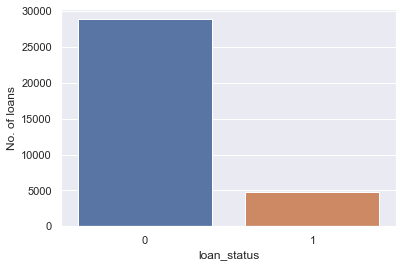

In [49]:
# loan defaulted by loan applicants
sns.countplot(data= df_loan, x= ls)
plt.ylabel("No. of loans")
plt.show()

In [50]:
LS = df_loan[ls]

In [51]:
LS.value_counts()

0    28873
1     4794
Name: loan_status, dtype: int64

In [52]:
round(LS.value_counts()[1]/LS.value_counts().sum()*100,2)

14.24

Out of total loans sanctioned excluding current loans 14.24% loans has been defaulted

In [53]:
#Understanding distribution of loans over the year
# Adding a new column issue_year
df_loan["issue_year"]=df_loan["issue_d"].apply(lambda x : str(x)[-2:]).astype("int64")

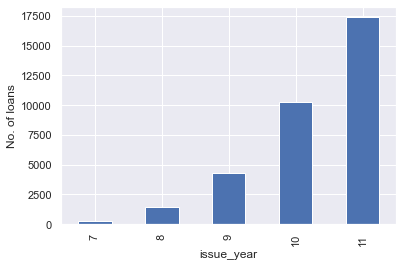

In [54]:
df_loan.groupby(by ="issue_year")["issue_year"].count().plot.bar()
plt.ylabel("No. of loans")
plt.show()

As seen in the plot above, over the years sanctioned loans has been increasing.

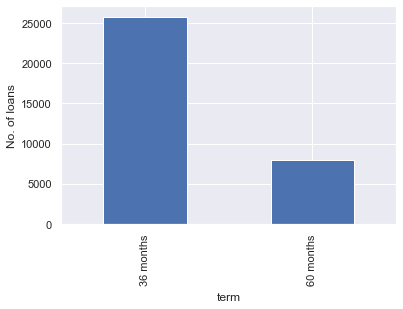

In [55]:
#Distribution of loans by term of loan
df_loan.groupby(by ="term")["term"].count().plot.bar()
plt.ylabel("No. of loans")
plt.show()

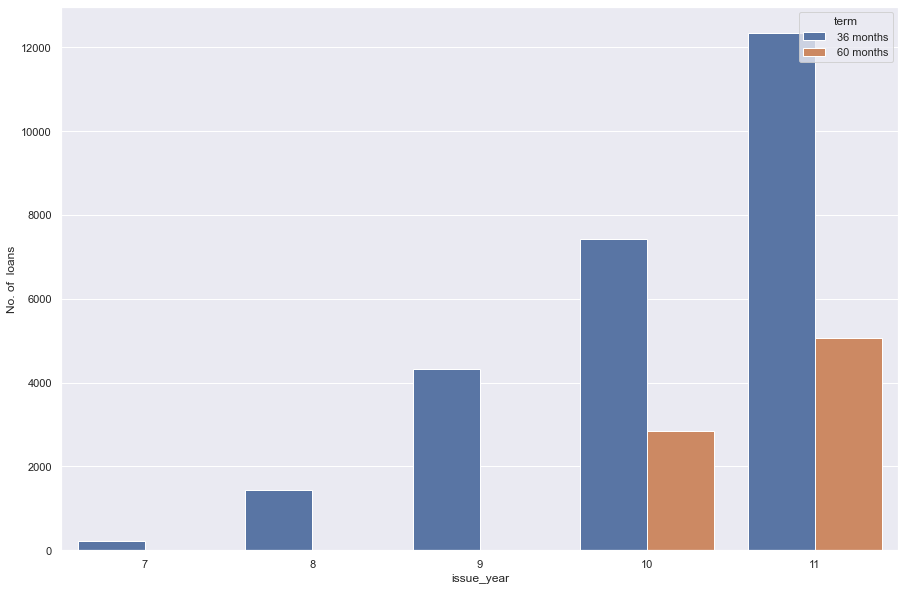

In [56]:
#Distrubution of loan comapred to term of loan
plt.figure(figsize=(15,10))
sns.countplot(data=df_loan, x="issue_year" , hue ="term" )
plt.ylabel("No. of  loans")
plt.show()

Loans with  60 month term has been started from 2010

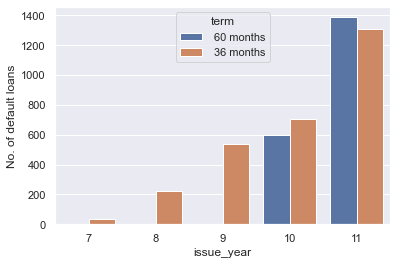

In [57]:
#Distribution of No. of default for 60 and 36 month term over years
sns.countplot(data=df_loan[df_loan[ls]==1], x ="issue_year", hue="term")
plt.ylabel("No. of default loans")
plt.show()

- After starting sanctioning loan with 60 months term from 2010 it is seen that no. of defaults in 60 month term loan are on a increasing trend comapred to 36 month term loan.

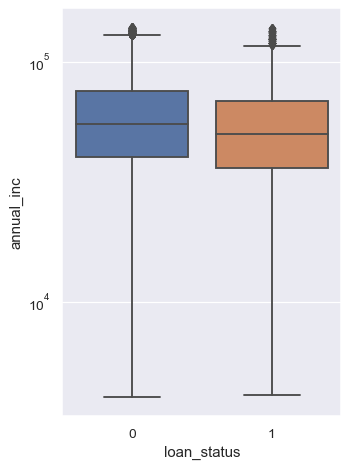

0 = Fully Paid
1= Charged Off


In [58]:
#Variation of annual income on log scale of loan applicants for loan paid off and default loan 
plt.figure(figsize=(4,6), dpi=90)
sns.boxplot(data=df_loan, y='annual_inc',x =ls)
plt.yscale("log")
plt.show()
print( "0 = Fully Paid")
print("1= Charged Off")

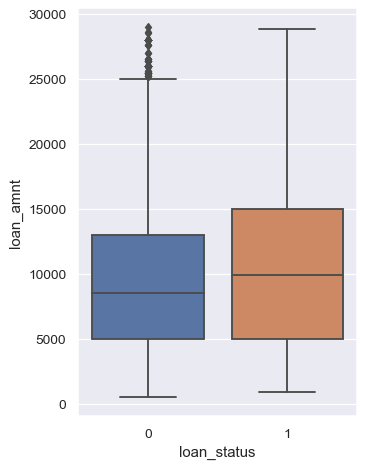

0 = Fully Paid
1= Charged Off


In [59]:
#Variation of Loan amount applied by loan applicants for loan fully paid off and default loan
plt.figure(figsize=(4,6), dpi=90)
sns.boxplot(data=df_loan, x=ls, y="loan_amnt")
plt.show()
print( "0 = Fully Paid")
print("1= Charged Off")

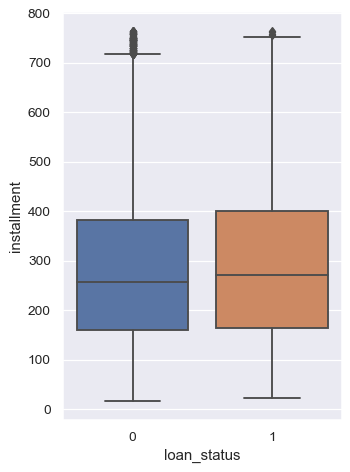

0 = Fully Paid
1= Charged Off


In [57]:
#Variation of installment amount for loan fully paid off and default loan
plt.figure(figsize=(4,6), dpi=90)
sns.boxplot(data=df_loan, x=ls, y="installment")
plt.show()
print( "0 = Fully Paid")
print("1= Charged Off")

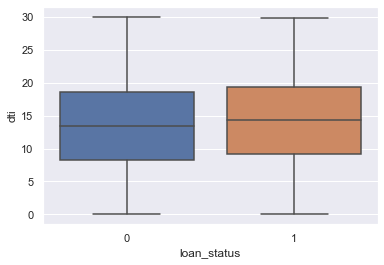

0 = Fully Paid
1= Charged Off


In [60]:
#Variation of Dti for loan fully paid off and default loan
sns.boxplot(data=df_loan, x=ls, y="dti")
plt.show()
print( "0 = Fully Paid")
print("1= Charged Off")

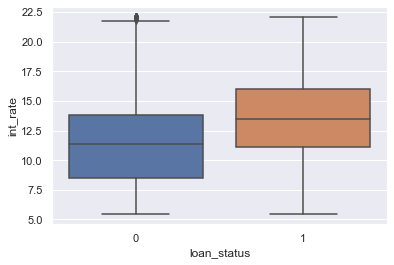

0 = Fully Paid
1= Charged Off


In [61]:
#Variation of Interest rate for loan fully paid off and default loan
sns.boxplot(data=df_loan, x=ls, y="int_rate")
plt.show()
print( "0 = Fully Paid")
print("1= Charged Off")

# 3.2 Bivariate Analysis

In [62]:
#fetching columns with quantitative variables
Columns= df_loan.select_dtypes(include=("float", "int64" , "int32")).columns

Columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'issue_year'],
      dtype='object')

<AxesSubplot:>

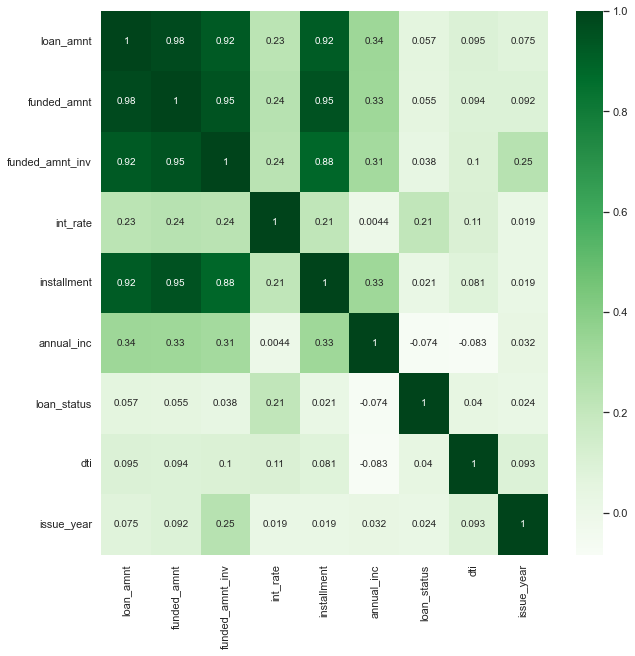

In [61]:
#Checking correlation among the data
plt.figure(figsize=(10,10))
sns.heatmap(df_loan[Columns].corr(), annot=True, cmap='Greens')

- Funded ammount and funded amount by investor has a stromg correcaltion with each other and with loan amount, therfore theses two columns can be dropped

In [63]:
#dropping funded amount and funded amount by incestor column from dataframe
df_loan =df_loan.drop(['funded_amnt','funded_amnt_inv'], axis =1)

In [64]:
#Column set with dtypes object 'mostly string'
cat_col = df_loan.select_dtypes(include = 'object').columns

#Dropping columns with unique values , columns which are unlikely to yield any conclusion and terms column already analysed above
cat_col = cat_col.drop(['issue_d','term'])
cat_col

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state'],
      dtype='object')

In [65]:
df_loan.loan_status.head()

0    0
1    1
2    0
3    0
5    0
Name: loan_status, dtype: int32

In [66]:
#Now as we now no. of deafults is directly linked with no. of loans therfore we need to adopt variation of %loan deafult out of given loans
#Defining function to comapred % deafult rate eith other variables

def get_def_rate(var_name,ascending=False):
       return df_loan.groupby(var_name)['loan_status'].mean().sort_values(ascending=ascending)*100

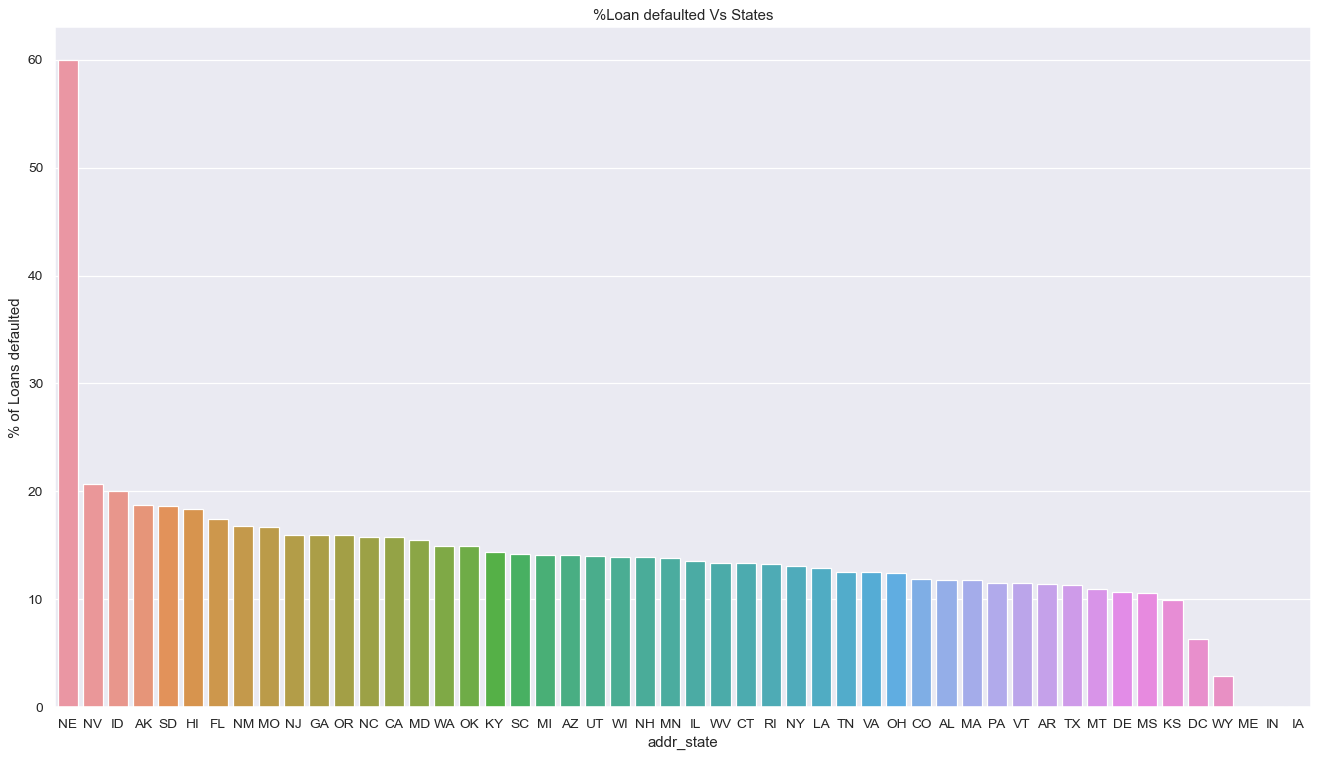

In [67]:
#Varaition of default rate with states of loan applicant
data_addr_state=get_def_rate('addr_state').reset_index()
plt.figure(figsize=(18,10), dpi=90)
sns.barplot(data=data_addr_state, x='addr_state', y=ls)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs States")
plt.show()

However no. of loan issued at NE are very small (5 Nos.). 2nd largest defaulting state is NV with 416 no. of loan issued.

In [67]:
df_loan[df_loan["addr_state"].isin (['NE','NV'])]["addr_state"].value_counts()

NV    416
NE      5
Name: addr_state, dtype: int64

As only 5 loans has been sanctioned in `NE` therefore high default in `NE` cannot be genearlized and can be ignored. The next state with maximum default rate is in `NV` which is having 416 no. of loan sanctioned.

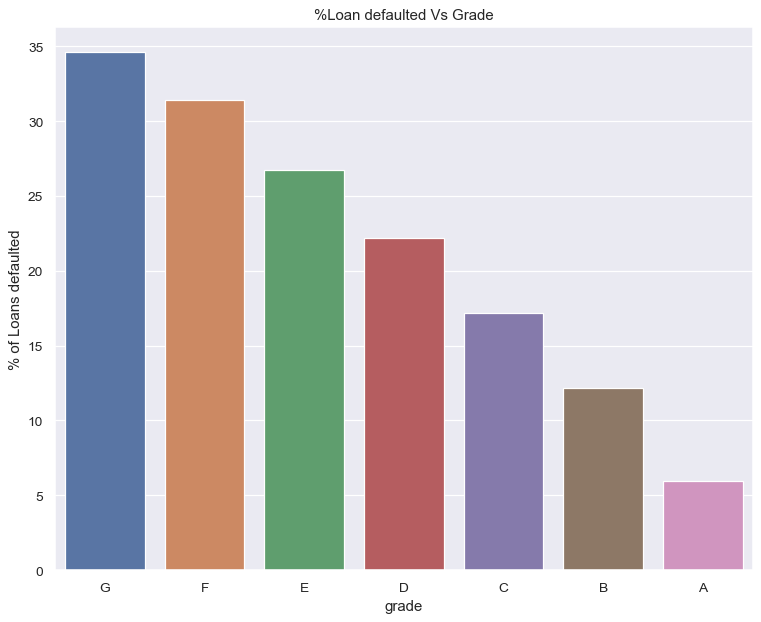

In [68]:
#Varaition of default rate with Loan Grade of loan applicant
data_grade=get_def_rate('grade').reset_index()
plt.figure(figsize=(10,8), dpi=90)
sns.barplot(data=data_grade, x='grade', y=ls)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Grade")
plt.show()

As apparent from above, grade G loans are having highest default rate.

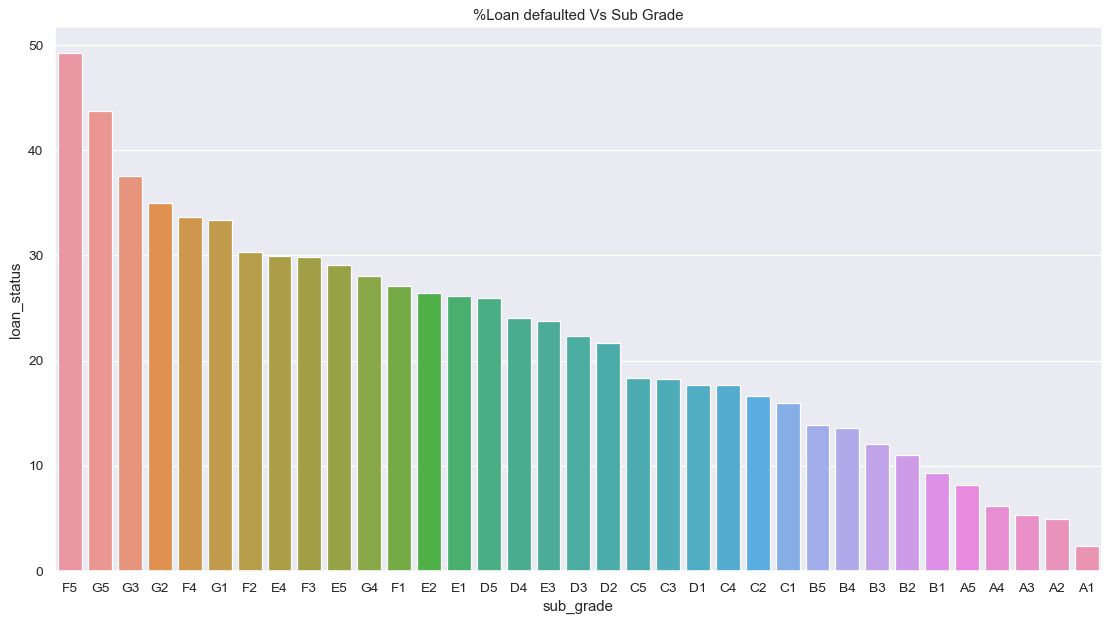

In [69]:
#Varaition of default rate with Sub Grade of loan applicant
data_sub_grade=get_def_rate('sub_grade').reset_index()
plt.figure(figsize=(15,8), dpi=90)
sns.barplot(data=data_sub_grade, x='sub_grade', y=ls)
plt.title("%Loan defaulted Vs Sub Grade")
plt.show()

As seen above sub grade F5 loans are having highest default rate.

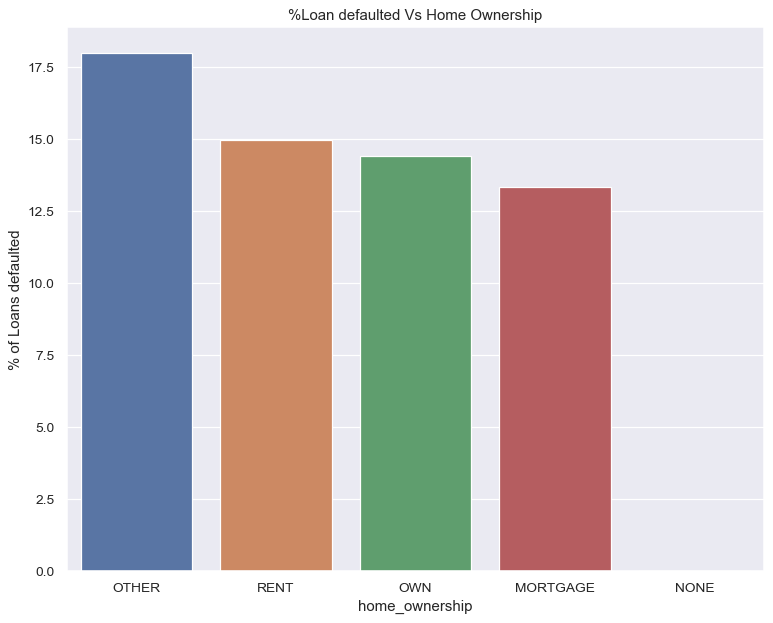

In [70]:
#Varaition of default rate with Home ownership of loan applicant
data_home_ownership=get_def_rate('home_ownership').reset_index()
plt.figure(figsize=(10,8), dpi=90)
sns.barplot(data=data_home_ownership, x='home_ownership', y=ls)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Home Ownership")
plt.show()

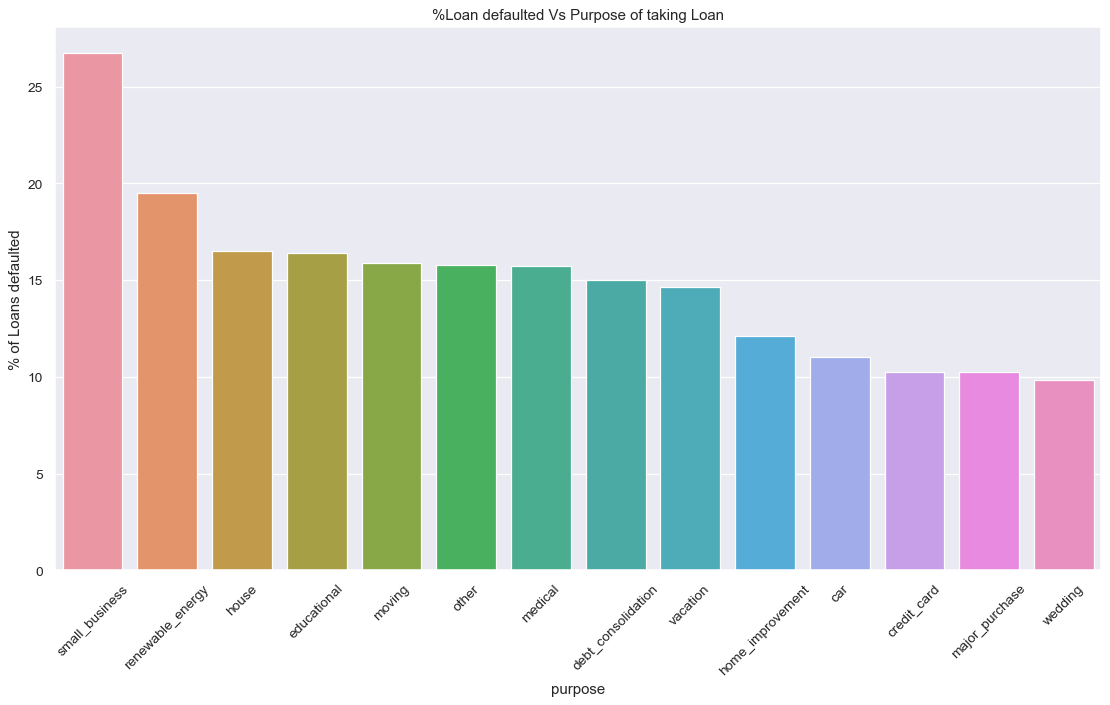

In [71]:
#Varaition of default rate with Purpose of taking Loan
data_purpose=get_def_rate('purpose').reset_index()
plt.figure(figsize=(15,8), dpi=90)
sns.barplot(data=data_purpose, x='purpose', y=ls)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Purpose of taking Loan")
plt.xticks(rotation=45)
plt.show()

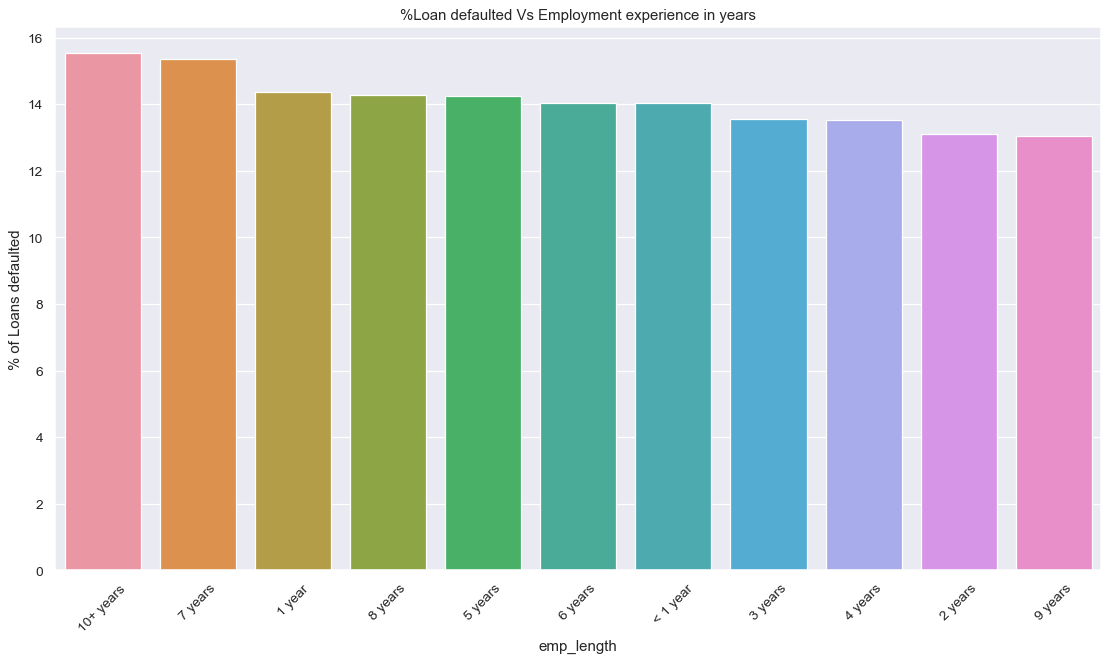

In [73]:
#Varaition of default rate with Employment length
data_emp_length=get_def_rate('emp_length').reset_index()
plt.figure(figsize=(15,8), dpi=90)
sns.barplot(data=data_emp_length, x='emp_length', y=ls)
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Employment experience in years")
plt.show()

As evident from above Employes with expereince more that 10 years are more likely to default loans.

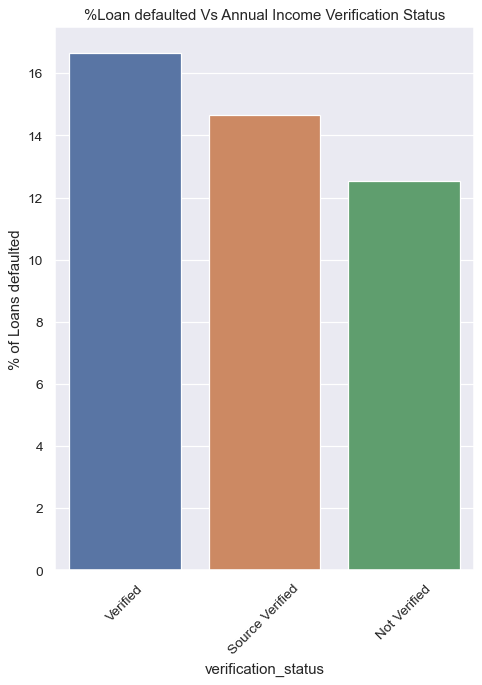

In [72]:
#Varaition of default rate with Annual Income Verification Status
data_verification_status=get_def_rate('verification_status').reset_index()
plt.figure(figsize=(6,8), dpi=90)
sns.barplot(data=data_verification_status, x='verification_status', y=ls)
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Annual Income Verification Status")
plt.show()

Maximum loan defaults are  with Annual Income verified Status, which is surprising.

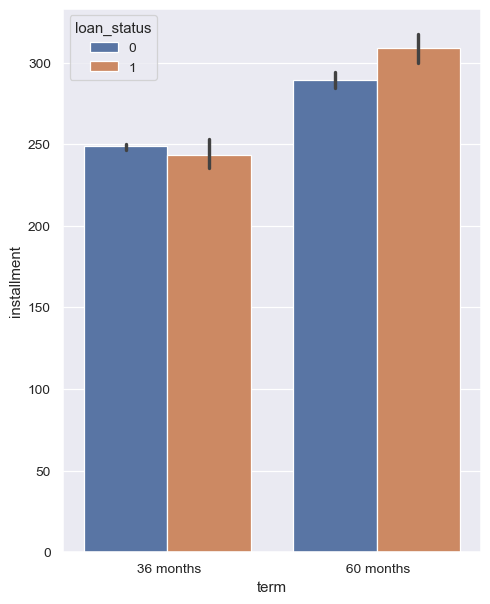

In [73]:
#Varaition of Installment  with term of loan and loan status
plt.figure(figsize=(6,8), dpi=90)
sns.barplot(data=df_loan, x='term', y='installment', hue=ls, estimator = np.median)
plt.show()

## 3.3 Derived Metrices

In [74]:
#Making bins of income from with 25, 50, 75 percentile bins
df_loan["Income_Bin"]=pd.qcut(df_loan.annual_inc, [0,0.25,0.5, 0.75,1],['Low Income','Medium income','High Income','Very High Income'])

In [75]:
df_loan["annual_inc"].quantile([0,0.25,0.5, 0.75,1])

0.00      4000.0
0.25     40000.0
0.50     55000.0
0.75     75000.0
1.00    139992.0
Name: annual_inc, dtype: float64

In [76]:
#Dictinoary of income bins
Income_bin = {"Low Income":"4000.0 to  40000.0","Medium income":" 40000.0 to  55000.0","High Income":"55000.0 to  75000.0", "Very high Income":"75000.0 to 137004.0"}

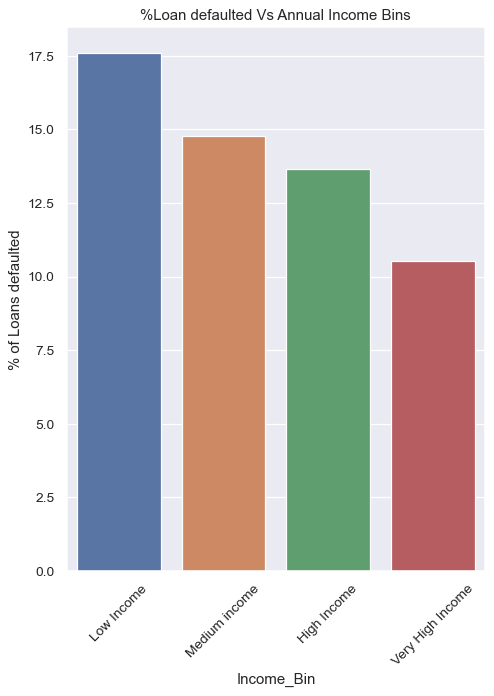

{'Low Income': '4000.0 to  40000.0', 'Medium income': ' 40000.0 to  55000.0', 'High Income': '55000.0 to  75000.0', 'Very high Income': '75000.0 to 137004.0'}


In [77]:
#Varaition of default rate with Annual Income bins
Annual_income_status=get_def_rate('Income_Bin').reset_index()

plt.figure(figsize=(6,8), dpi=90)
sns.barplot(data=Annual_income_status, x='Income_Bin', y=ls)
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Annual Income Bins")
plt.show()
print(Income_bin)

In [78]:
#Making bins of Dti from with 25, 50, 75 percentile bins
df_loan["Dti_Bin"]=pd.qcut(df_loan.dti, [0,0.25,0.5, 0.75,1],['Low Dti','Medium Dti','High Dti','Very High Dti'])

In [79]:
df_loan["dti"].quantile([0,0.25,0.5, 0.75,1])

0.00     0.00
0.25     8.32
0.50    13.53
0.75    18.70
1.00    29.99
Name: dti, dtype: float64

In [80]:
#Dictionary of DTI bins
Dti_bin ={"Low Dti":"0 to  8.35","Medium Dti":" 8.35 to  13.56","High Dti":"13.56 to  18.70", "Very high Dti":"18.70 to 29.99"}

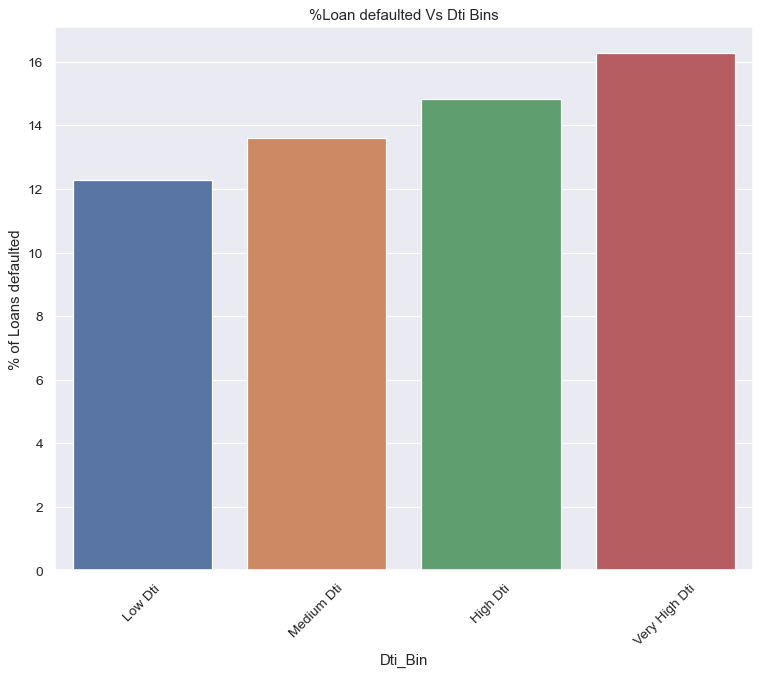

{'Low Dti': '0 to  8.35', 'Medium Dti': ' 8.35 to  13.56', 'High Dti': '13.56 to  18.70', 'Very high Dti': '18.70 to 29.99'}


In [81]:
#Varaition of default rate with DTI Bins
Dti_status=get_def_rate('Dti_Bin').reset_index()

plt.figure(figsize=(10,8), dpi=90)
sns.barplot(data=Dti_status, x='Dti_Bin', y=ls)
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Dti Bins")
plt.show()
print(Dti_bin)

It is observed that higher the Dti, higher is the default rate %

In [82]:
#Making bins of Interest rates from with 25, 50, 75 percentile bins
df_loan["int_rate_bin"]=pd.qcut(df_loan.int_rate, [0,0.25,0.5, 0.75,1],['Low interest','Medium interest','High interest','Very High interest'])

In [83]:
df_loan["int_rate"].quantile([0,0.25,0.5, 0.75,1])

0.00     5.42
0.25     8.90
0.50    11.71
0.75    14.22
1.00    22.11
Name: int_rate, dtype: float64

In [84]:
#Dictionary of Interest rate bins
int_rate_bin ={"Low int_rate":"5.42 to  8.90","Medium int_rate":" 8.90 to  11.71","High int_rate":"11.71 to  14.22", "Very high int_rate":"14.22 to 22.11"}

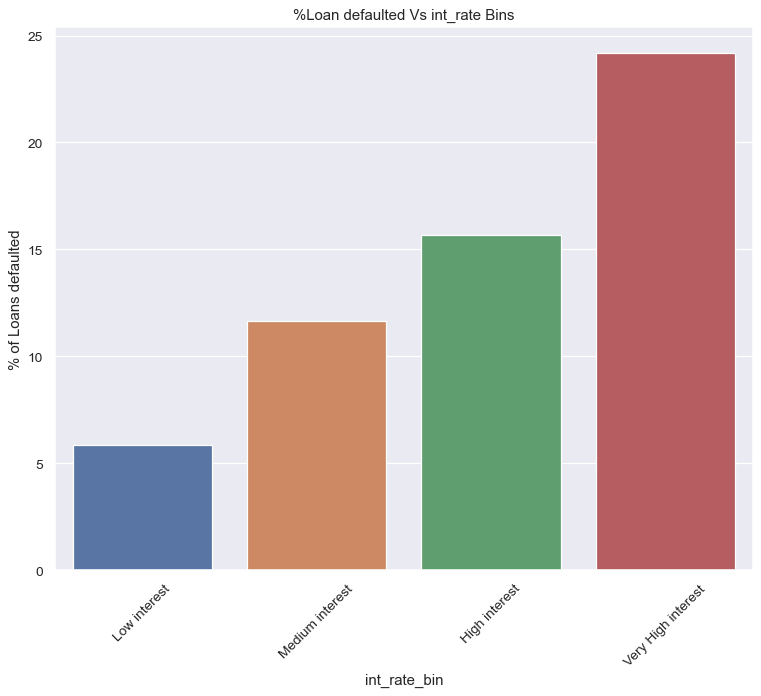

{'Low int_rate': '5.42 to  8.90', 'Medium int_rate': ' 8.90 to  11.71', 'High int_rate': '11.71 to  14.22', 'Very high int_rate': '14.22 to 22.11'}


In [85]:
#Varaition of default rate with Interest bins
int_rate_status=get_def_rate('int_rate_bin').reset_index()

plt.figure(figsize=(10,8), dpi=90)
sns.barplot(data=int_rate_status, x='int_rate_bin', y=ls)
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs int_rate Bins")
plt.show()

print(int_rate_bin)

It is observed that higher the Interest rate, higher is the default rate %

In [86]:
#Making bins of Loan rates from with 25, 50, 75 percentile bins
df_loan["loan_amnt_bin"]=pd.qcut(df_loan.int_rate, [0,0.25,0.5, 0.75,1],['Low loan_amnt','Medium loan_amnt','High loan_amnt','Very High loan_amnt'])

In [87]:
df_loan["loan_amnt"].quantile([0,0.25,0.5, 0.75,1])

0.00      500.0
0.25     5000.0
0.50     8875.0
0.75    13600.0
1.00    29000.0
Name: loan_amnt, dtype: float64

In [88]:
#Dictionary of Loan amount bins
Loan_amount_bin ={"Low loan_amnt":"500.0 to   5000.0","Medium loan_amnt":"  5000.0 to  8875.0","High loan_amnt":"8875.0 to  13600.0", "Very high loan_amnt":"13600.0 to 29000.0"}

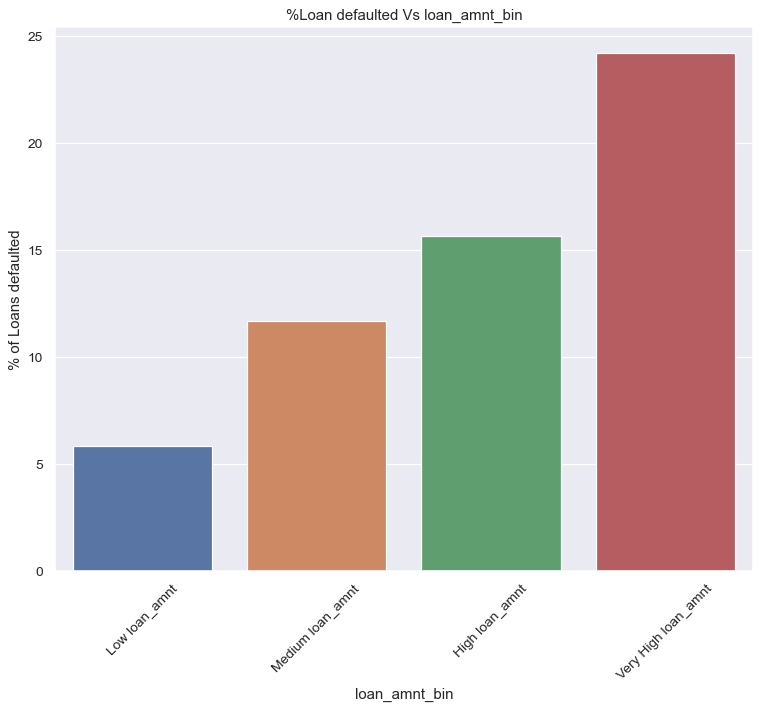

{'Low loan_amnt': '500.0 to   5000.0', 'Medium loan_amnt': '  5000.0 to  8875.0', 'High loan_amnt': '8875.0 to  13600.0', 'Very high loan_amnt': '13600.0 to 29000.0'}


In [89]:
#Varaition of default rate with Loan amount
loan_amnt_status=get_def_rate('loan_amnt_bin').reset_index()

plt.figure(figsize=(10,8), dpi=90)
sns.barplot(data=loan_amnt_status, x='loan_amnt_bin', y=ls)
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs loan_amnt_bin")
plt.show()

print(Loan_amount_bin)

It is observed that higher the Loan amount, higher is the default rate %

As installment is highly correlated with loan amount, it is assumed that simailar variation as above shall be there.

## Multivariate analysis

<Figure size 1920x720 with 0 Axes>

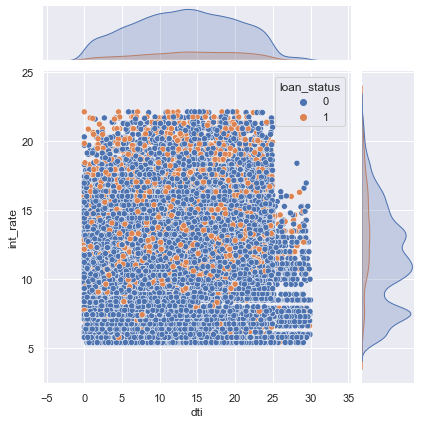

In [90]:
#Lets check variation between dti and interest rate and loan status
plt.figure(figsize=(16, 6), dpi=120)
sns.jointplot(data=df_loan, x='dti', y="int_rate", hue="loan_status")
plt.show()

- From above following is observed:
    1. Lonas are not being offered for higher dti(> ~25%) and higher interest rate (> ~15%)
    2. Less defaults are being observed for lower interest rate irrespective of dti.

In [91]:
#Let us check the varaition of default % with term and loan issue year
df_issue_year_term=df_loan.groupby(['term','issue_year'])['loan_status'].mean().sort_values(ascending=False) * 100
df_issue_year_term=df_issue_year_term.reset_index()
df_issue_year_term

,term,issue_year,loan_status
0,60 months,11,27.44
1,60 months,10,21.05
2,36 months,7,16.59
3,36 months,8,15.19
4,36 months,9,12.40
5,36 months,11,10.58
6,36 months,10,9.54


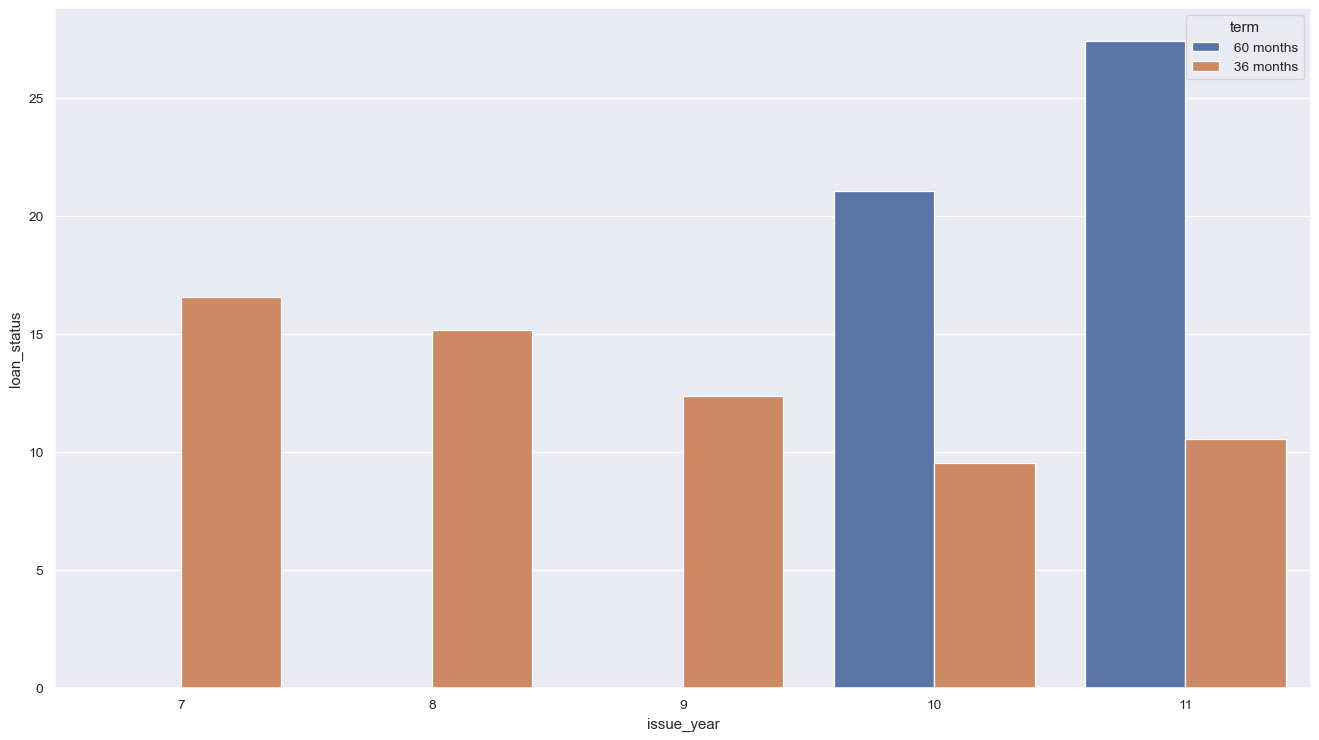

In [92]:
plt.figure(figsize=(18,10), dpi=90)
sns.barplot(data=df_issue_year_term, x='issue_year', y=ls, hue="term")
plt.show()

- As can be seen there is a decreasing trend of loan default in 36 month term loans, however 60 month term loans deafult rate is on increasing trend ever since its inception in 2010.

In [93]:
#For Multivariate analysis let us define a function for fetching two variables and % default rate 
def get_def_rate_var2(var1_name, var2_name,ascending=False):
       return df_loan.groupby([var1_name, var2_name])['loan_status'].mean().sort_values(ascending=ascending)*100

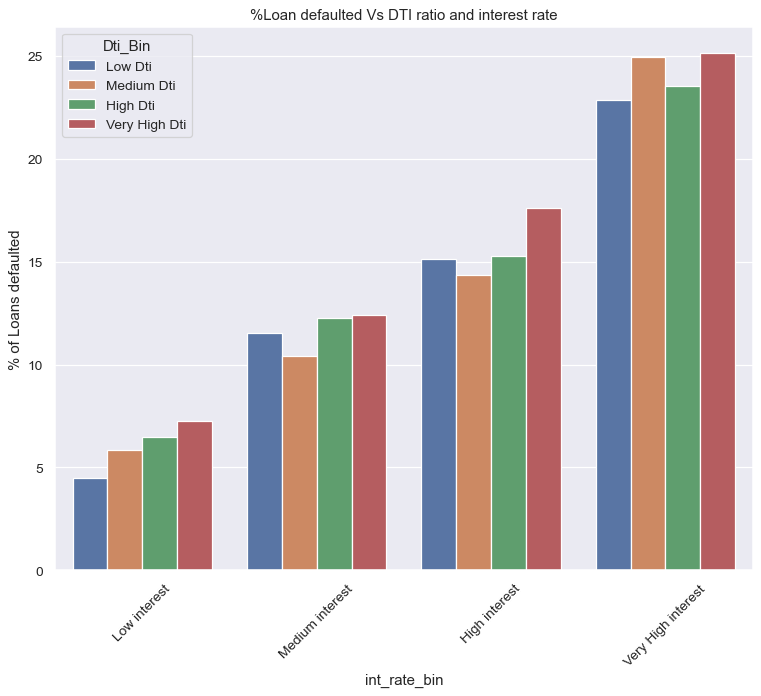

{'Low int_rate': '5.42 to  8.90', 'Medium int_rate': ' 8.90 to  11.71', 'High int_rate': '11.71 to  14.22', 'Very high int_rate': '14.22 to 22.11'}
{'Low Dti': '0 to  8.35', 'Medium Dti': ' 8.35 to  13.56', 'High Dti': '13.56 to  18.70', 'Very high Dti': '18.70 to 29.99'}


In [94]:
# Lets check combined effect of DTI ratio and interest rate on default %
Data_Dti_int_rate=get_def_rate_var2('int_rate_bin', 'Dti_Bin').reset_index()
plt.figure(figsize=(10,8), dpi=90)
sns.barplot(data=Data_Dti_int_rate, x='int_rate_bin', y=ls, hue='Dti_Bin')
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs DTI ratio and interest rate")
plt.show()

print(int_rate_bin)
print(Dti_bin)

In case of very high interest rate, medium DTI is yielding alomst same deafult rate as very high DTI.

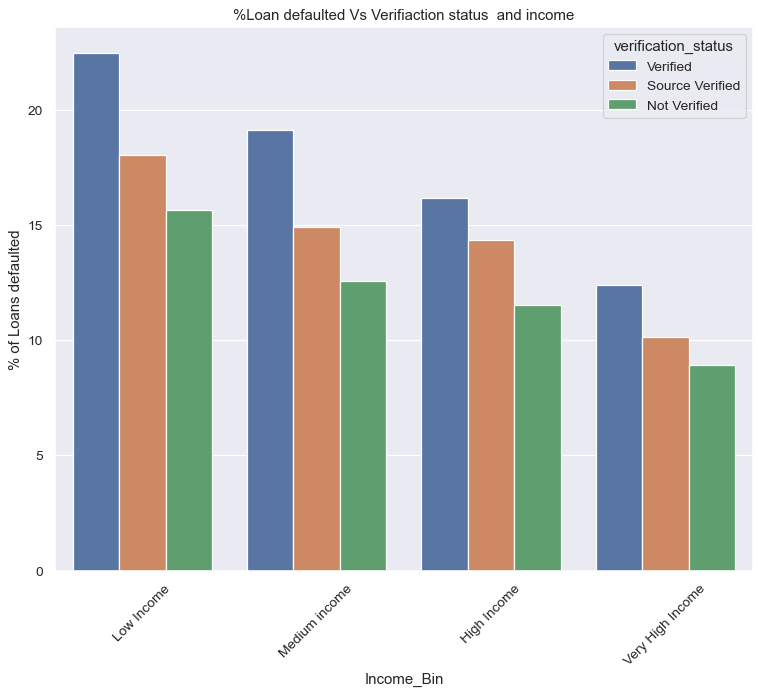

{'Low Income': '4000.0 to  40000.0', 'Medium income': ' 40000.0 to  55000.0', 'High Income': '55000.0 to  75000.0', 'Very high Income': '75000.0 to 137004.0'}


In [95]:
#Lets Check combined effect of Verifiaction status  and income on default %
Data_ver_status_Income=get_def_rate_var2('Income_Bin', 'verification_status').reset_index()
plt.figure(figsize=(10,8), dpi=90)
sns.barplot(data=Data_ver_status_Income, x='Income_Bin', y=ls, hue='verification_status')
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Verifiaction status  and income")
plt.show()
print(Income_bin)


Variation is as per earlier variation brought out above. No abnormality observed.

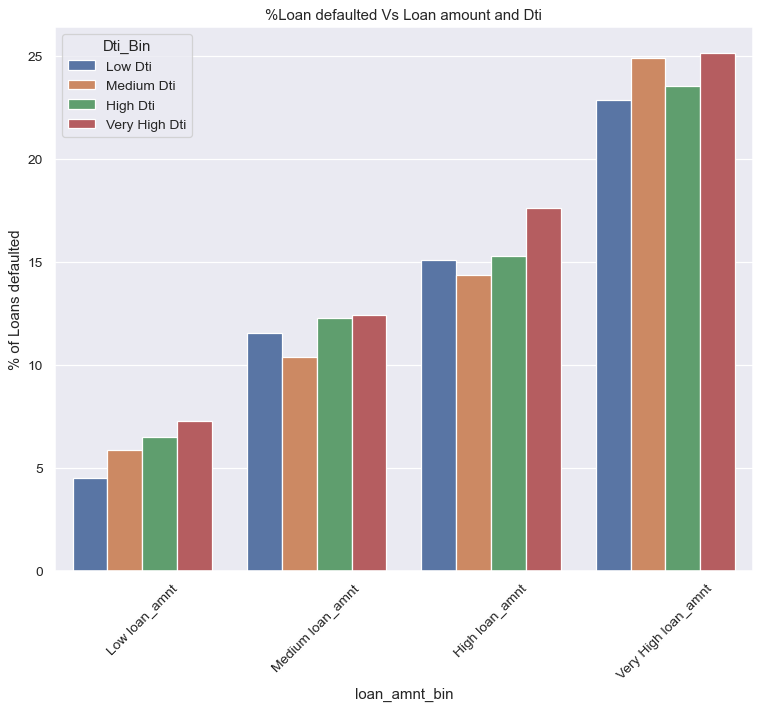

{'Low loan_amnt': '500.0 to   5000.0', 'Medium loan_amnt': '  5000.0 to  8875.0', 'High loan_amnt': '8875.0 to  13600.0', 'Very high loan_amnt': '13600.0 to 29000.0'}
{'Low Dti': '0 to  8.35', 'Medium Dti': ' 8.35 to  13.56', 'High Dti': '13.56 to  18.70', 'Very high Dti': '18.70 to 29.99'}


In [96]:
#Lets Check combined effect of Loan amount and DTI on default %
Data_loan_amt_Dti=get_def_rate_var2('loan_amnt_bin', 'Dti_Bin').reset_index()
plt.figure(figsize=(10,8), dpi=90)
sns.barplot(data=Data_loan_amt_Dti, x='loan_amnt_bin', y=ls, hue='Dti_Bin')
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Loan amount and Dti")
plt.show()
print(Loan_amount_bin)
print(Dti_bin)

Variation is as per earlier variation brought out above. No abnormality observed.

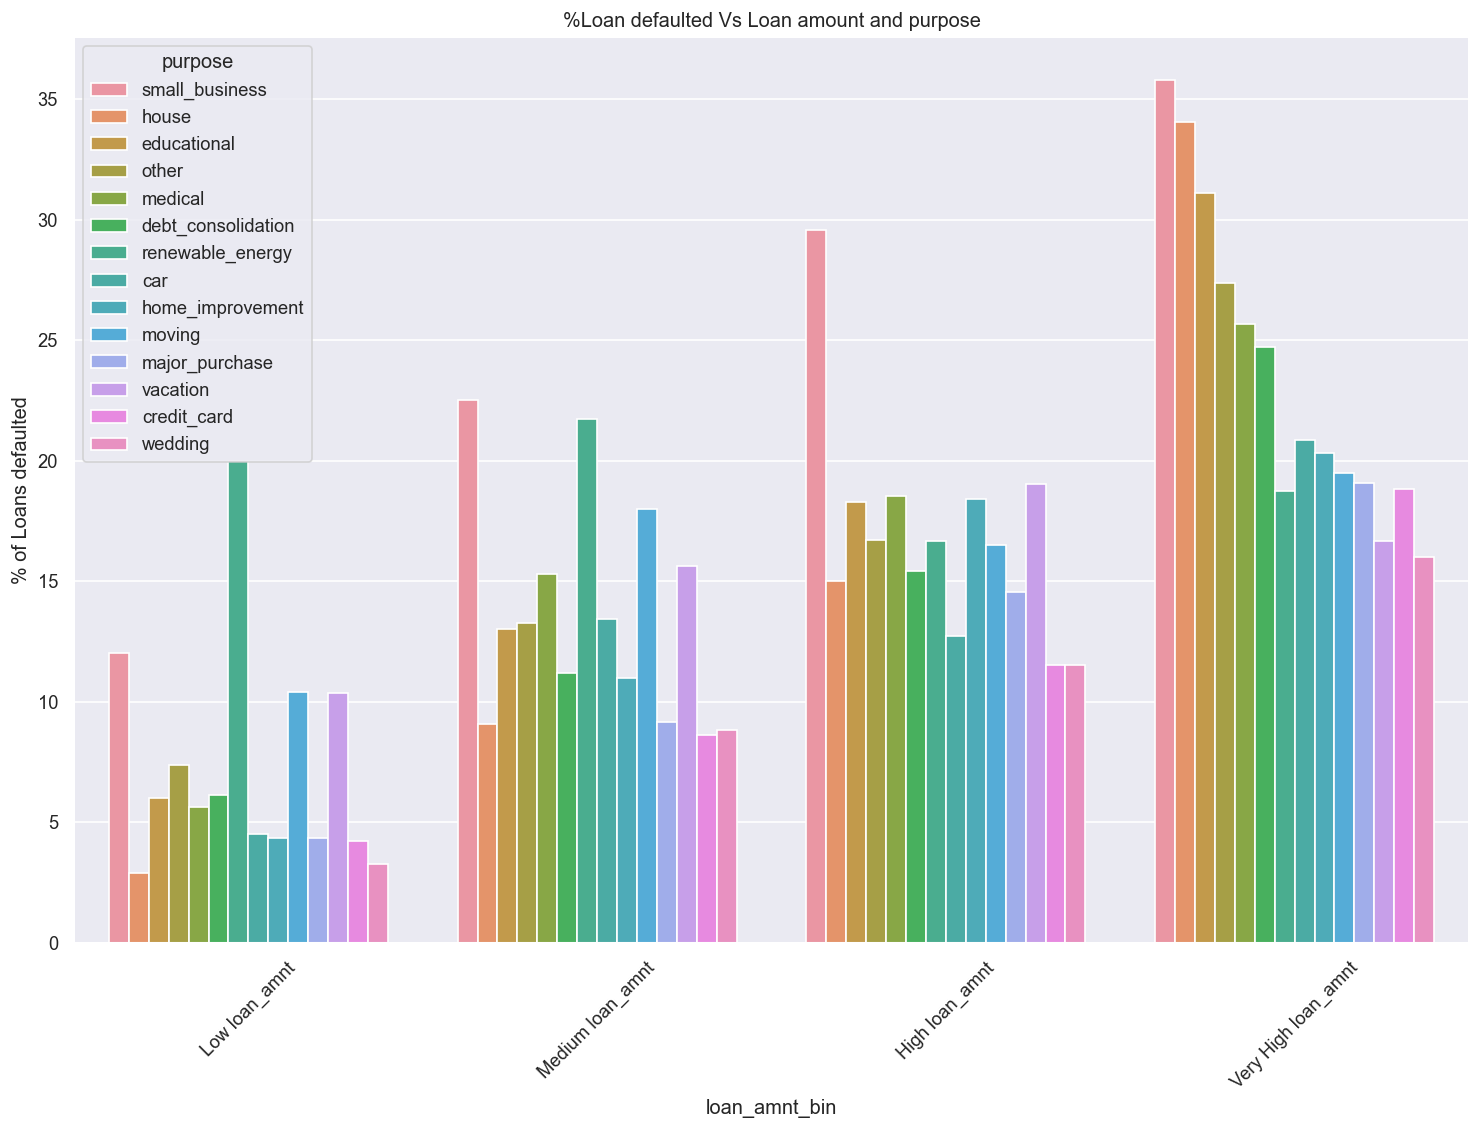

{'Low loan_amnt': '500.0 to   5000.0', 'Medium loan_amnt': '  5000.0 to  8875.0', 'High loan_amnt': '8875.0 to  13600.0', 'Very high loan_amnt': '13600.0 to 29000.0'}


In [97]:
#Lets Check combined effect of Loan amount and purpose on default %
Data_loan_amt_purpose=get_def_rate_var2('loan_amnt_bin', 'purpose').reset_index()
plt.figure(figsize=(15,10), dpi=120)
sns.barplot(data=Data_loan_amt_purpose, x='loan_amnt_bin', y=ls, hue='purpose')
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Loan amount and purpose")
plt.show()
print(Loan_amount_bin)

- From above following is observed:
    1. In general max default for all the bins of loan amount is for loan given to 'small business'. 
    2. For low and medium loan amount default rates are higher for 'Renewable Energy' purpose of loan.
    3. For very high loan amount, house and education loan are having max default rate after 'small business'.

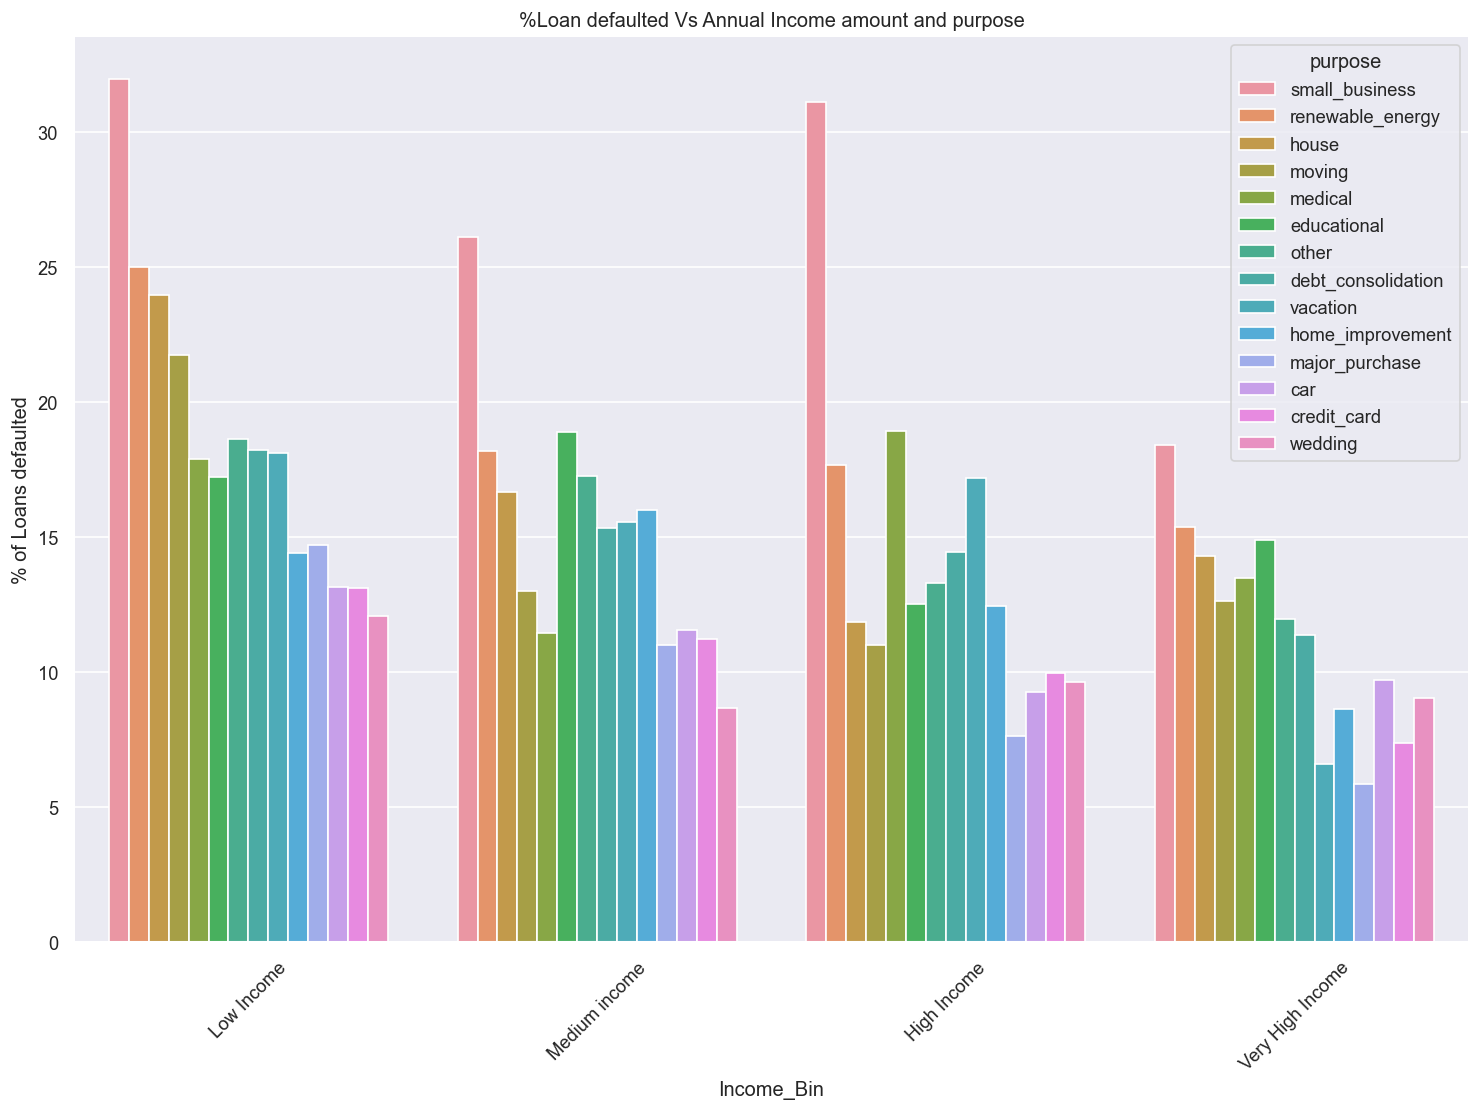

{'Low Income': '4000.0 to  40000.0', 'Medium income': ' 40000.0 to  55000.0', 'High Income': '55000.0 to  75000.0', 'Very high Income': '75000.0 to 137004.0'}


In [99]:
#Lets Check combined effect of Loan amount and purpose on default %
Data_income_purpose=get_def_rate_var2('Income_Bin', 'purpose').reset_index()
plt.figure(figsize=(15,10), dpi=120)
sns.barplot(data=Data_income_purpose, x='Income_Bin', y=ls, hue='purpose')
plt.xticks(rotation=45)
plt.ylabel("% of Loans defaulted")
plt.title("%Loan defaulted Vs Annual Income amount and purpose")
plt.show()
print(Income_bin)

Again similar trend is there. Loan to `small business` is having max default rate among all income groups.

# 4. Conclusion:

1. No. of loans being offered are in an increasing trend from 2007 to 2011 and so does the loan default rate.
3. Default rate is much higher for 60 months term comapred to 36 month term ever since its inception in 2010. Infact default rate is on decreasing trend for 36 months term may be due to increasing 60 month term loan. Therfore no. of `60 months term loan` may be reduced.
4. It is observed that there is higher tendency of loan default when loan is being offered for purpose of `small business`, therfore no. of loans to small business may be reduced or offered after due diligence.
5. Less defaults are being observed for lower interest rate irrespective of dti, therfore, low interest rate loans may be given  in `more nos.`. Also. Lonas are not being offered for higher dti(> ~25%) and higher interest rate (> ~15%) may be due to high default risk asociated with such loans.
6. For low and small loan amount default rates are higher for debt consolidation purpose of loan and also for very high loan amount, house and education loan are having max default rate after small business.
7. In case of very high interest rate, medium DTI is yielding alomst same deafult rate as very high DTI.
8. It is observed that loan applicants with verified annual income are defaulting more comapred to Not verified and Source verified. It may conclude that annual income is not being verified correctly or income is being verified for highly risky applicants.